<h2>Multiple Linear Regression Model</h2>

<br>
<ul>
<h3>Importing Libraries</h3>
<li>Pandas</li>
<li>Numpy</li>
<li>Matplotlib</li>
</ul>

In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

<h3>Fetching the dataset</h3>
<p>The features that we'll use to predict the profit(labels) are :</p>
<ol>
    <li>R & D Spend</li>
    <li>Adminstration</li>
    <li>Marketing Spend</li>
    <li>Profit</li>
</ol>
<p>Moreover, to speed up calculations for gradient descent, I will make each of the feature values in roughly the same range. This can be done by calculating the z-score of each feature value. This technique is known as <b>feature scaling</b> and <b>mean normalization.</b></p>

In [196]:
dataset = pd.read_csv(r"50_Startups.csv")
independent_var = dataset.iloc[:,:-2]
ones = np.ones([independent_var.shape[0],1])
independent_var = np.concatenate((ones,independent_var),axis=1)

dependent_var = dataset.iloc[:,4].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349,136898,471784,New York,192262
1,162598,151378,443899,California,191792
2,153442,101146,407935,Florida,191050
3,144372,118672,383200,New York,182902
4,142107,91392,366168,Florida,166188


In [184]:
print(dependent_var[:10])
print(independent_var[:10])

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96]
[[1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [1.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [1.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [1.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]]


<h3>Normalizing the dataset</h3>
<p>As we know that normalizing the dataset is necessary. So by using this formula<img src="index.png"> and then plotted the graph using matplotlib library</p>

[[-1.00333607  0.63078923  0.34960593  3.65926504]
 [-1.00333607  0.60359634  0.49270874  3.3836738 ]
 [-1.00333607  0.51310632 -0.00373119  3.02824407]
 [-1.00333607  0.42347701  0.16948008  2.7837905 ]
 [-1.00333607  0.40109147 -0.10012715  2.61547227]]
(50, 4)


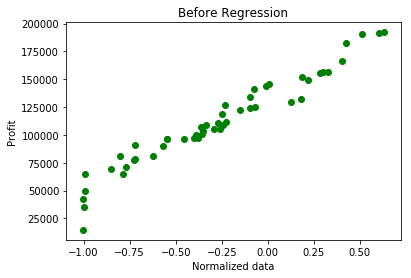

In [204]:
independent_var = (independent_var - independent_var.mean())/independent_var.std()
print(independent_var[:5])
print(independent_var.shape)

plt.scatter(independent_var[:,1], dependent_var, color="green")
plt.xlabel('Normalized data')
plt.ylabel('Profit')
plt.title('Before Regression')
plt.show()

<h3>Adding 1's to the feature matrix</h3>

<p>We add ones to the feature index 0 for all training examples as this allows us to do matrix operations with theta and x. Hence, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>

In [132]:
independent_var = np.column_stack((np.ones(len(dependent_var)),independent_var))
print(independent_var[:5])
print(independent_var.shape)

[[ 1.          0.31484664  0.01610715  3.53241077]
 [ 1.          0.28595591  0.16814484  3.2396125 ]
 [ 1.          0.18981598 -0.3592912   2.86199087]
 [ 1.          0.0945905  -0.17526518  2.6022744 ]
 [ 1.          0.07080728 -0.46170582  2.42344693]]
(50, 4)


<h3>Optimizing parameters for our multivariate linear regression</h3>

<p>In gradient descent, we estimate the parameters in the hypothesis function that leads to minimization of the cost function. In other words, we try to get the optimal values of theta such that our regression line fits the data well.</p>

<p>The way we do this is by taking the derivative (the tangent line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter alpha, which is called the <b>learning rate.</b></p> 

In [205]:
def calculate_error(theta, x, y):
    return np.subtract(np.dot(x, theta), y)

def calculate_gradient(cost, x):
    return np.sum(np.dot(np.transpose(x), cost)) / x.shape[0]

def gradient_descent(x, y, alpha=0.5, epochs=10000):
    theta = np.zeros(x.shape[1])
    for _ in range(epochs):
        cost = calculate_error(theta, x, y)
        gradient = calculate_gradient(cost, x)
        theta = theta - alpha * gradient
    return theta

optimized_theta = gradient_descent(independent_var, dependent_var)
print(optimized_theta)

theta0, theta1 = optimized_theta[0], optimized_theta[2]

[21911.04037475 21911.04037475 21911.04037475 21911.04037475]


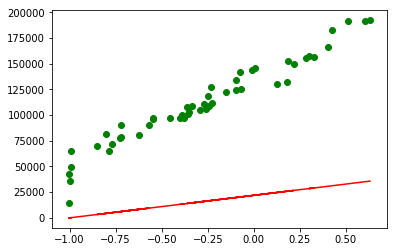

In [206]:
plt.scatter(independent_var[:,1], dependent_var, color="green")
plt.plot(independent_var[:,1], theta0 + theta1 * independent_var[:,1], color="red")
plt.show()